Data Overview

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/predictive_maintenance.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Class Balance

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

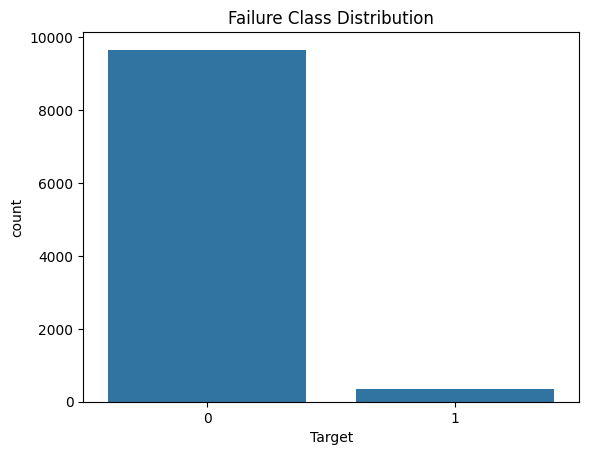

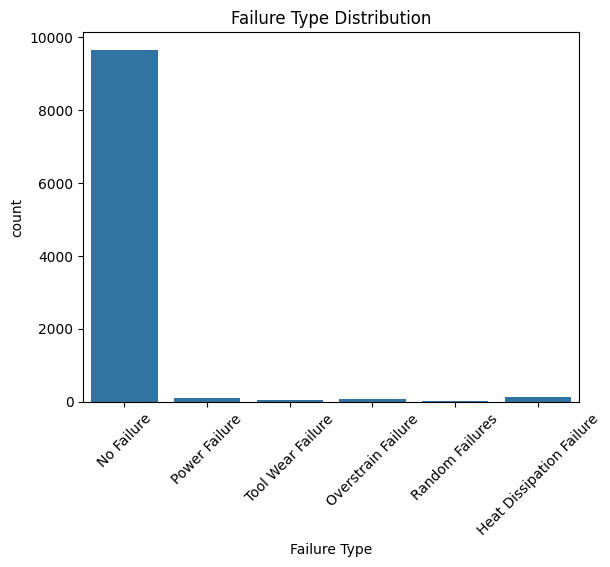

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Binary target
sns.countplot(x = "Target", data = df)
plt.title("Failure Class Distribution")

plt.figure()
sns.countplot(x = "Failure Type", data = df)
plt.title("Failure Type Distribution")
plt.xticks(rotation = 45)


Numerical Distribution

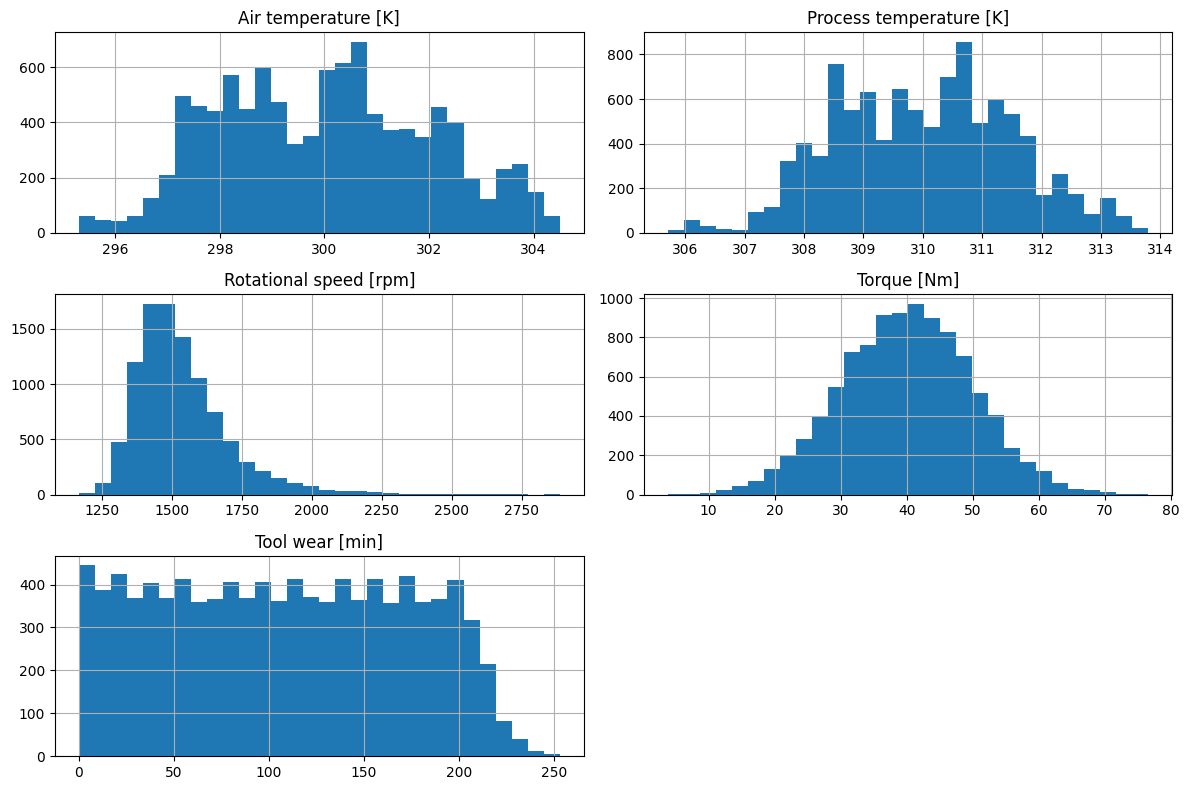

In [4]:
num_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

df[num_cols].hist(bins = 30, figsize =(12,8))
plt.tight_layout()

Feature Correlation

<Axes: >

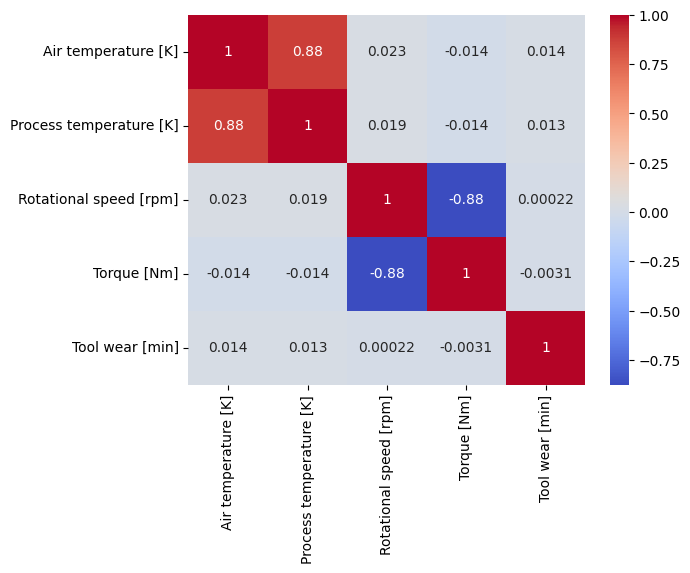

In [5]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm")

Feature vs Target Analysis

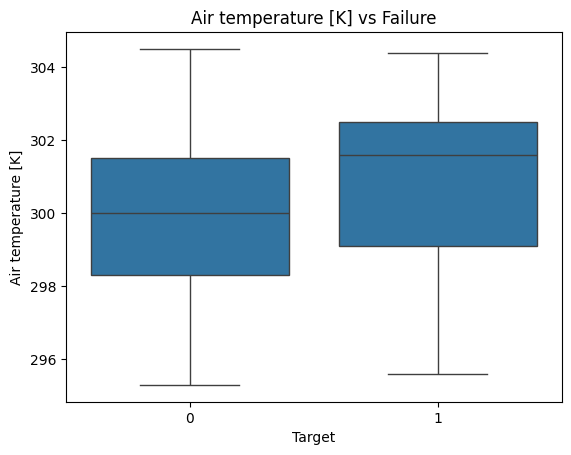

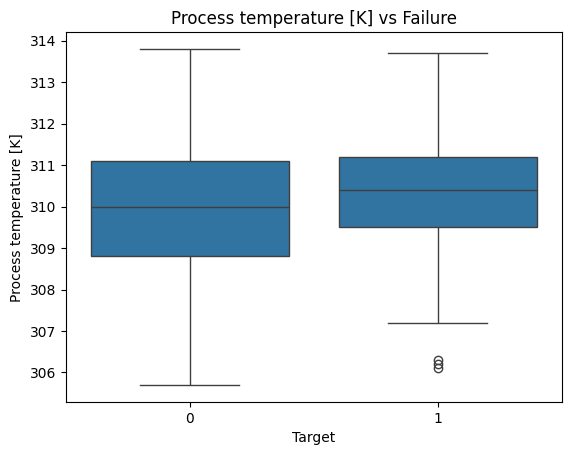

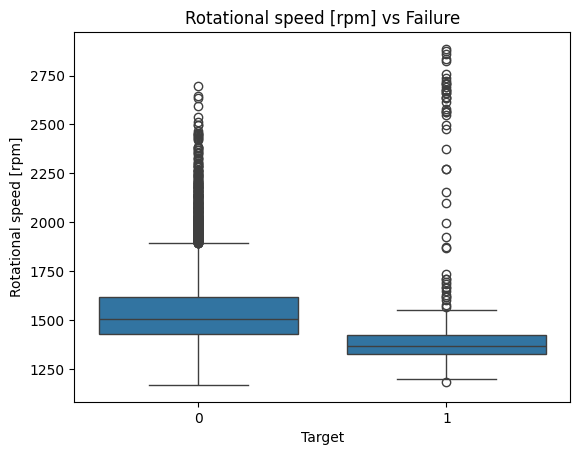

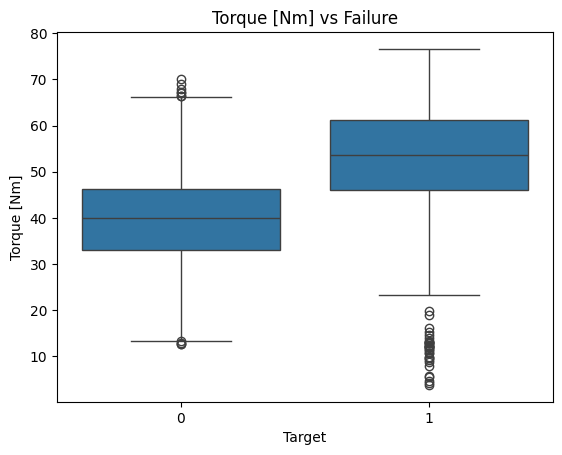

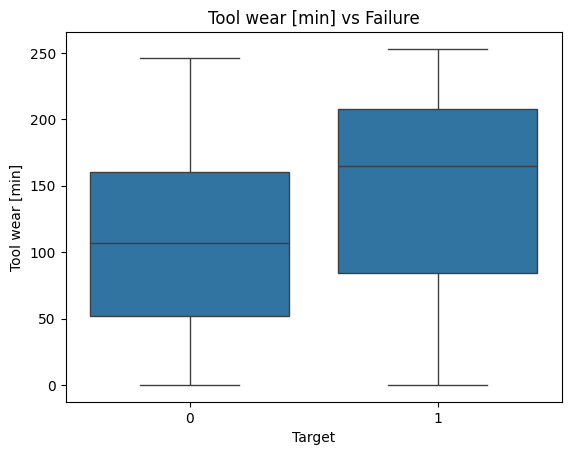

In [6]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x = "Target", y = col, data = df)
    plt.title(f"{col} vs Failure")

Categorical Variables Analysis

Text(0.5, 1.0, 'Type vs Failure')

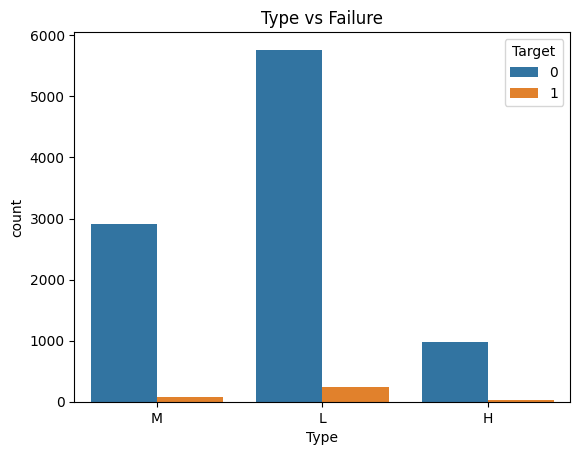

In [7]:
sns.countplot(x = "Type", hue = "Target", data = df)
plt.title("Type vs Failure")

Derived Feature Analysis

<Axes: xlabel='Target', ylabel='Temp_Diff'>

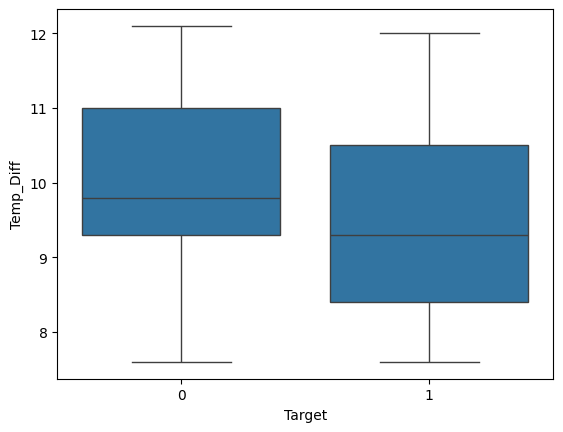

In [8]:
df["Temp_Diff"] = df["Process temperature [K]"] - df["Air temperature [K]"]
sns.boxplot(x = "Target", y = "Temp_Diff", data = df)

Outlier Analysis

In [9]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[num_cols])) # Calculate Z-scores for numerical columns
outlier_mask = (z_scores > 3).any(axis = 1) # Identify outliers that have a Z-score greater than 3
df[outlier_mask]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temp_Diff
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure,10.2
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,Power Failure,10.3
298,299,H29712,H,297.9,308.5,2129,18.7,126,0,No Failure,10.6
305,306,L47485,L,297.8,308.4,2129,19.2,148,0,No Failure,10.6
344,345,M15204,M,297.5,308.2,2448,13.8,29,0,No Failure,10.7
...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure,11.2
9832,9833,L57012,L,298.4,309.2,2118,17.7,210,0,No Failure,10.8
9849,9850,L57029,L,298.6,309.4,2312,15.5,44,0,No Failure,10.8
9865,9866,M24725,M,298.9,309.8,2450,13.9,89,0,No Failure,10.9
